In [1]:
import pandas as pd
import numpy as np
import ast
from IPython.display import display

In [2]:
df = pd.read_csv('opportunity-1024-unbalanced.txt', sep=';')

In [3]:
max_acc = max(df['Source Accuracy'])
user_thres = [0, 0.01, 0.03, 0.1, 0.3, 1]
src_thres = [max_acc * (1-x) for x in user_thres]
src_thres, user_thres

([0.8242964398497027,
  0.8160534754512057,
  0.7995675466542116,
  0.7418667958647325,
  0.5770075078947918,
  0.0],
 [0, 0.01, 0.03, 0.1, 0.3, 1])

In [4]:
df['Number of Features'] = df['Features'].apply(lambda x: len(ast.literal_eval(x)))

In [7]:
import os
filename = os.path.basename(globals()['__session__'])
results_list = []

for src_t, user_t in zip(src_thres, user_thres):
    # print("Source Accuracy Threshold:", src_t)
    # print(User Threshold:", user_t)
    
    # Filter rows based on source accuracy threshold
    filtered_df = df[df['Source Accuracy'] >= src_t]
    
    # Find the lowest threat accuracy
    min_threat_accuracy = filtered_df['Threat Accuracy'].min()
    
    # Filter rows with similar threat accuracy (<1% difference)
    similar_threat_rows = filtered_df[
        (filtered_df['Threat Accuracy'] >= min_threat_accuracy) & 
        (filtered_df['Threat Accuracy'] <= min_threat_accuracy * 1.01)
    ]
    
    # Find the row with the minimum number of features among these rows
    # min_feats = similar_threat_rows['Number of Features'].min()
    # result = similar_threat_rows[similar_threat_rows['Number of Features'] <= min_feats+1]
    
    # Sort and select the row with minimum threat accuracy
    selected_row = similar_threat_rows.sort_values(by='Threat Accuracy').iloc[0]
    
    # Append result to list
    results_list.append([
        user_t,
        selected_row['Source Accuracy'],
        selected_row['Threat Accuracy'],
        selected_row['Number of Features'],
        selected_row['Features']
    ])

# columns = ['Threshold', 'Source Accuracy', 'Threat Accuracy', f"# Features (Max {max(df['Number of Features'])})"]
# result_df = pd.DataFrame(results_list, columns=columns)
# result_df.to_csv(filename + '.csv', index=False)

In [9]:
results_list

[[0,
  0.8242964398497027,
  0.6921461053521926,
  10,
  '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]'],
 [0.01, 0.8168466377132871, 0.6645660362451696, 8, '[0, 1, 2, 4, 5, 6, 7, 8]'],
 [0.03, 0.8010303313372696, 0.6011358275995883, 7, '[0, 1, 4, 5, 7, 8, 9]'],
 [0.1, 0.7539973556223234, 0.5094528368967368, 5, '[1, 4, 5, 7, 8]'],
 [0.3, 0.5839276211987071, 0.3050526668014416, 3, '[5, 7, 8]'],
 [1, 0.4275770482889389, 0.2614192732841172, 2, '[7, 8]']]

In [11]:
feat10 = [0, 3, 4, 45, 57, 70, 96, 122, 123, 132]
feat5 = [3, 45, 57, 70, 122]
feat7 = [3, 4, 45, 57, 70, 122, 132]

def find_index(full, subset):
    result = []
    for n in subset:
        result.append(full.index(n))
    return result

print(find_index(feat10, feat5))
print(find_index(feat10, feat7))

[1, 3, 4, 5, 7]
[1, 2, 3, 4, 5, 7, 9]


In [26]:
import os
import ast

filename = os.path.basename(globals()['__session__'])

def find_best(given_feat_indexes):
    results_list = []
    subset_df = df[df['Features'].apply(lambda x: set(ast.literal_eval(x)).issubset(set(given_feat_indexes)))]
    max_acc = max(subset_df['Source Accuracy'])
    user_thres = [0, 0.01, 0.03, 0.1, 0.3, 1]
    src_thres = [max_acc * (1-x) for x in user_thres]

    for src_t, user_t in zip(src_thres, user_thres):
        # print("Source Accuracy Threshold:", src_t)
        # print(User Threshold:", user_t)
        
        # Filter rows based on source accuracy threshold
        filtered_df = subset_df[subset_df['Source Accuracy'] >= src_t]
        
        # Find the lowest threat accuracy
        min_threat_accuracy = filtered_df['Threat Accuracy'].min()
        
        # Filter rows with similar threat accuracy (<1% difference)
        similar_threat_rows = filtered_df[
            (filtered_df['Threat Accuracy'] >= min_threat_accuracy) & 
            (filtered_df['Threat Accuracy'] <= min_threat_accuracy * 1.01)
        ]
        
        # Find the row with the minimum number of features among these rows
        # min_feats = similar_threat_rows['Number of Features'].min()
        # result = similar_threat_rows[similar_threat_rows['Number of Features'] <= min_feats+1]
        
        # Sort and select the row with minimum threat accuracy
        selected_row = similar_threat_rows.sort_values(by='Threat Accuracy').iloc[0]
        
        # Append result to list
        results_list.append([
            user_t,
            selected_row['Source Accuracy'],
            selected_row['Threat Accuracy'],
            selected_row['Number of Features'],
            selected_row['Features']
        ])

    columns = ['Threshold', 'Source Accuracy', 'Threat Accuracy', f"# Features (Max {max(df['Number of Features'])})", 'Features']
    result_df = pd.DataFrame(results_list, columns=columns).drop('Features', axis=1)
    result_df.to_csv(filename + str(len(given_feat_indexes)) + '.csv', index=False)
    return results_list

find_best(find_index(feat10, feat5))



[[0, 0.7705096120107727, 0.5738996670128989, 5, '[1, 3, 4, 5, 7]'],
 [0.01, 0.7705096120107727, 0.5738996670128989, 5, '[1, 3, 4, 5, 7]'],
 [0.03, 0.7705096120107727, 0.5738996670128989, 5, '[1, 3, 4, 5, 7]'],
 [0.1, 0.6991090910358385, 0.493971144216179, 3, '[1, 4, 5]'],
 [0.3, 0.5714086539466988, 0.335076112997186, 2, '[1, 7]'],
 [1, 0.4274411114751584, 0.2616632624370566, 1, '[7]']]

In [27]:
find_best(find_index(feat10, feat7))

[[0, 0.7890609206059296, 0.6149781455430153, 7, '[1, 2, 3, 4, 5, 7, 9]'],
 [0.01, 0.7831366316019398, 0.60944191547751, 6, '[1, 2, 3, 4, 5, 7]'],
 [0.03, 0.767135590581554, 0.5703676335608242, 6, '[1, 2, 4, 5, 7, 9]'],
 [0.1, 0.741601544799894, 0.5028372452927521, 4, '[1, 4, 5, 7]'],
 [0.3, 0.5853079026924783, 0.3188973084510871, 3, '[5, 7, 9]'],
 [1, 0.4274411114751584, 0.2616632624370566, 1, '[7]']]

In [22]:
find_best(find_index(feat10, feat10))

[[0,
  0.8242964398497027,
  0.6921461053521926,
  10,
  '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]'],
 [0.01, 0.8168466377132871, 0.6645660362451696, 8, '[0, 1, 2, 4, 5, 6, 7, 8]'],
 [0.03, 0.8010303313372696, 0.6011358275995883, 7, '[0, 1, 4, 5, 7, 8, 9]'],
 [0.1, 0.7539973556223234, 0.5094528368967368, 5, '[1, 4, 5, 7, 8]'],
 [0.3, 0.5839276211987071, 0.3050526668014416, 3, '[5, 7, 8]'],
 [1, 0.4275770482889389, 0.2614192732841172, 2, '[7, 8]']]

Source Accuracy Threshold: 0.5921568159726156
Source Accuracy Threshold: 0.5896568159726157
Source Accuracy Threshold: 0.5871568159726156
Source Accuracy Threshold: 0.5821568159726156
Source Accuracy Threshold: 0.5771568159726156
Source Accuracy Threshold: 0.5721568159726156
Source Accuracy Threshold: 0.5671568159726156
Source Accuracy Threshold: 0.5621568159726156


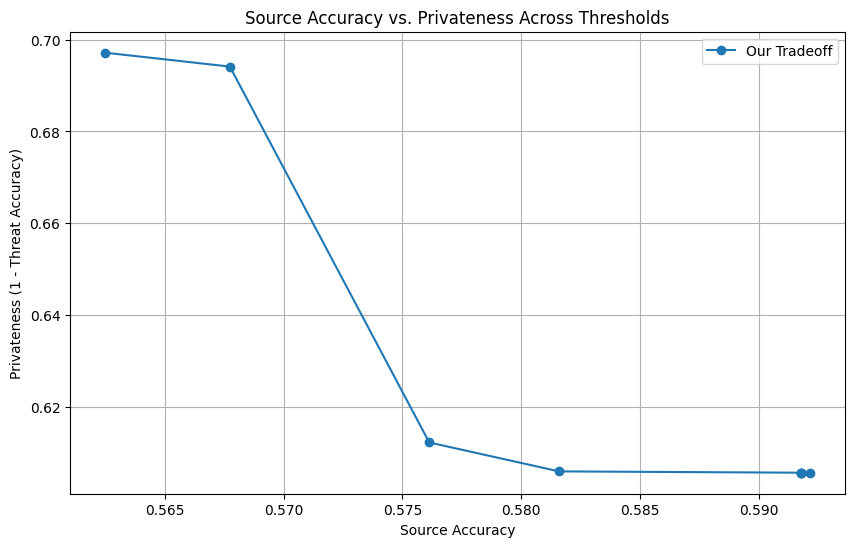

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Collect results for plotting
plot_data = []

for src_t in src_thres:
    print("Source Accuracy Threshold:", src_t)
    
    # Filter rows based on source accuracy threshold
    filtered_df = df[df['Source Accuracy'] >= src_t]
    
    # Find the lowest threat accuracy
    min_threat_accuracy = filtered_df['Threat Accuracy'].min()
    
    # Filter rows with similar threat accuracy (<1% difference)
    similar_threat_rows = filtered_df[
        (filtered_df['Threat Accuracy'] >= min_threat_accuracy) & 
        (filtered_df['Threat Accuracy'] <= min_threat_accuracy * 1.01)
    ]
    
    # Find the row with the minimum number of features among these rows
    min_feats = similar_threat_rows['Number of Features'].min()
    result = similar_threat_rows[similar_threat_rows['Number of Features'] <= min_feats+1]
    
    # Select the first data point for the current threshold
    if not result.empty:
        first_row = result.iloc[0]
        plot_data.append({
            'Source Accuracy': first_row['Source Accuracy'],
            'Privateness': 1 - first_row['Threat Accuracy'],
            'Threshold': src_t
        })

# Convert collected data to a DataFrame
plot_df = pd.DataFrame(plot_data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(plot_df['Privateness'], plot_df['Source Accuracy'], marker='o', label='Our Tradeoff')
    
plt.ylabel('Source Accuracy')
plt.xlabel('Privateness (1 - Threat Accuracy)')
plt.title('Source Accuracy vs. Privateness Across Thresholds')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
for src_t in src_thres:
    print("Source Accuracy Threshold:", src_t)
    min_feats = min(df[df['Source Accuracy']>=src_t]['Number of Features'])
    display(df[(df['Source Accuracy']>=src_t) & (df['Number of Features']==min_feats)].sort_values(by='Threat Accuracy'))

Source Accuracy Threshold: 0.5921568159726156


,Features,Source Accuracy,Threat Accuracy,Number of Features
6655,"[0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12]",0.592157,0.394443,11


Source Accuracy Threshold: 0.5896568159726157


,Features,Source Accuracy,Threat Accuracy,Number of Features
6527,"[0, 1, 4, 6, 7, 8, 9, 10, 11, 12]",0.591644,0.394246,10
6399,"[0, 1, 5, 6, 7, 8, 9, 10, 11, 12]",0.591793,0.394437,10


Source Accuracy Threshold: 0.5871568159726156


,Features,Source Accuracy,Threat Accuracy,Number of Features
6527,"[0, 1, 4, 6, 7, 8, 9, 10, 11, 12]",0.591644,0.394246,10
6399,"[0, 1, 5, 6, 7, 8, 9, 10, 11, 12]",0.591793,0.394437,10


Source Accuracy Threshold: 0.5821568159726156


,Features,Source Accuracy,Threat Accuracy,Number of Features
6527,"[0, 1, 4, 6, 7, 8, 9, 10, 11, 12]",0.591644,0.394246,10
6399,"[0, 1, 5, 6, 7, 8, 9, 10, 11, 12]",0.591793,0.394437,10


Source Accuracy Threshold: 0.5771568159726156


,Features,Source Accuracy,Threat Accuracy,Number of Features
6271,"[0, 1, 6, 7, 8, 9, 10, 11, 12]",0.58159,0.394151,9


Source Accuracy Threshold: 0.5721568159726156


,Features,Source Accuracy,Threat Accuracy,Number of Features
7284,"[0, 1, 2, 6, 7, 8, 10]",0.574111,0.456642,7


Source Accuracy Threshold: 0.5671568159726156


,Features,Source Accuracy,Threat Accuracy,Number of Features
7220,"[0, 1, 2, 7, 8, 10]",0.570432,0.455062,6


Source Accuracy Threshold: 0.5621568159726156


,Features,Source Accuracy,Threat Accuracy,Number of Features
7220,"[0, 1, 2, 7, 8, 10]",0.570432,0.455062,6


In [11]:
# Ensemble of threat models (multiple threat models)
# weighted decision based on threat model 1 accuracy, threat model 2 accuracy, number of features
# what evidence do we need to remove feature #2
# use number of features as tie-breaking rule, instead of threat accuracy